# Multi-class Classification of Anonymized Data

## 1. Overview

Anonymization techniques such as k-anonymization, as well as it's modifications l-diversity and t-closeness provide individuals' anonymity in datasets, but can significantly disturb the performance of machine learning algorithms. Yet, they are sometimes necessary to keep privacy from individuals in datasets. 

In this notebook, Adult dataset from UCI Machine Learning Repository is used to depict this behaviour. We performed a multi-class classification task on target attribute 'education-num' with several classifiers. 

The aim was mainly to recreate the results from paper *"DO NOT DISTURB? Classifier Behavior on Perturbed Datasets"*,  chapter *4.2. Anonymized datasets*, by B. Malle, P. Kieseberg, et al.

### Dataset
Adult dataset from UCI Machine Learning Repository contains 14 attributes (columns) and cca. 32000 rows (30162 rows with Non-null values).

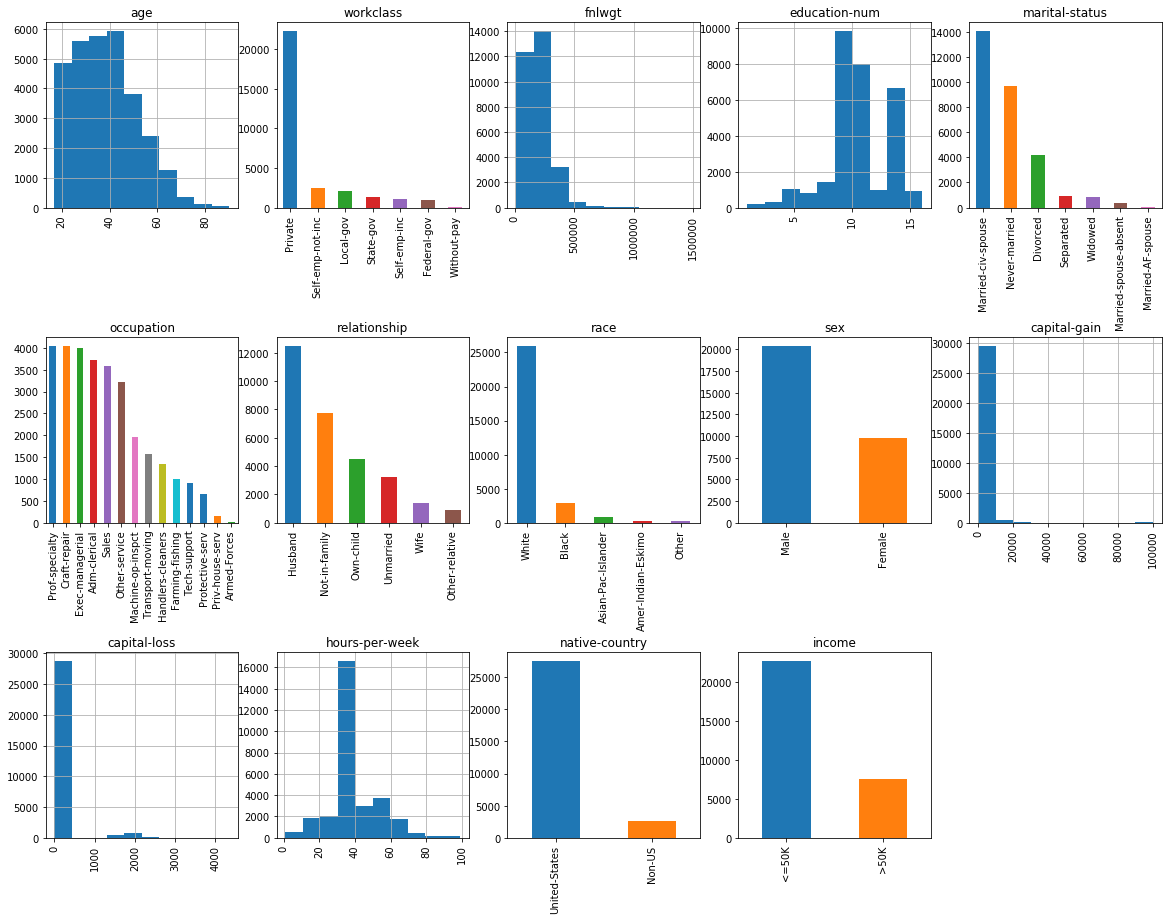

In [3]:
plot_distribution_all()

### k-anonymity
The k-anonymization technique provides anonymity for the individuals in the dataset such that they cannot be distinguished from at least k-1 other individuals from the dataset. Experiments are done with 10 different k values: 3, 7, 11, 15, 19, 23, 27, 31, 35 and 100, in order to both:
<ul>
    <li>examine characteristics of anonymized datasets</li>
    <li>analyze the results of the same classification task using anonymized data.</li>
</ul>
The tool used for data anonymization is ARX, open source software for anonymizing sensitive personal data. 
Defined hierarchies: 
<ul>
    <li>age: [17,18,...,86,88,90] -> [17-20,20-25,25-30,...,65-70,70+] -> [17-20,20s,30s,...,60s,70+]</li>
    <li>marital-status: [(Divorced, Never-married, Widowed), (Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Separated)] -> [Not-married, Married]</li>
    <li>hours-per-week: [1,2,3,...,98,99] -> [40-,40,40+]</li>
</ul>
In the experiments dataset is anonymized in following ways:
<ol>
    <li>Global transformation - all values from a single column are anonymized to the same level; this results in many unnecessarily anonymized values</li>
    <li>Local transformation - data is devided in clusters to obtain the smallest possible level of anonymization - this results in values of the same column anonymized to different levels</li>
</ol>

### Classification
The target attribute for the classification is 'education-num'. The original values [1,2,...,16] are grouped into 4 groups:
<ul>
    <li>[1,2,3,4] -> 1 : primary school</li>
    <li>[5,6,7,8,9] -> 2 : high school</li>
    <li>[10,11,12,13] -> 3 : college up to bachelors</li>
    <li>[14,15,16] -> 4 : advanced studies</li>
</ul>
Therefore, we performed 4-class classification.

The prediction is done by 4 classifiers:
<ol>
    <li>Logistic Regression - sklearn implementation, LogisticRegression</li>
    <li>Linear SVC - sklearn implementation, LinearSVC</li>
    <li>Random Forest - Weka (machine learning software written in Java)</li>
    <li>Gradient Boosting - RapidMiner (data science software platform)</li>
</ol>

## 2. Experiments
A number of experiments were done in order to obtain results as good as possible, for example, three different classification tools are used, all mentioned before, and different ways of preprocessing the dataset (eg. using number-encoded values or binary attributes for classifiers that accept only numerical data, etc.). Also, besides only two mentioned ways to anonymize data, globally and locally, it was necessary to find a tradeoff between those two. Both techniques had one main drawback that leads to bad results. For global transformation, it's the fact that we unnecessarily lose a lot of information, when we could have obtained the same level of privacy by anonymizing fewer values. Local transformation seemed as the solution for that, in fact, it is, but only if we perform it for categorical data. By performing the local transformation on continuous data we are ending up with a mix of categorical (anonymized) and continuous (original) rows in the same attribute, which is already a problem for any classifier, not to mention a large number of values we obtain that way. Indeed, the main technique and most important part of this experiment in order to obtain good results were exactly to locally anonymize categorical data and globally continuous data.

As a performance measure, we use f1 micro score.

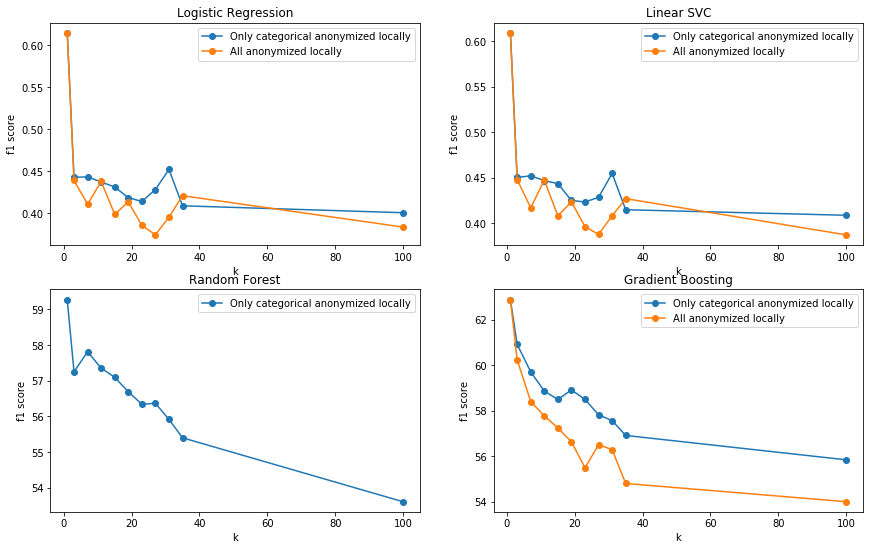

In [11]:
plot_results()

## 3. Conclusion
Classifier performance mostly drops as k value increases, as expected. In general, performance is better with some meaningful anonymization as it is for the case where only categorical data are anonymized locally and continuous data globally. Logistic Regression and Linear SVC have an odd increase in performance for k values 27 and 31 (blue line). An explanation for this could be that for those values of k some important attribute remained more non-anonymized than it is the case for other k values. This leads to the conclusion that it is also important **which** attributes we prefer to be anonymized and not only **how**. The same assumption holds for rapid drop and increases in Logistic Regression and Linear SVC performances with the change of k (orange line). Here the effect is expressed even more due to a large number of possible values we can get for anonymizing continuous attributes locally.

The whole experiment, reconstruction-wise, was limited by several things that staid unknown:
<ul>
    <li>Anonymization tool used in paper
    <li>Possible preprocessings
    <li>Hierarchies for dataset anonymization
    <li>Classification libraries and tools
<ul>